<b> Question 1 - Import Retail Sales Data. Check the structure and summary of the data. </b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline


In [2]:


df = pd.read_csv("RETAIL_SALES_DATA.csv")

print(df)

      Sales  Store_Size  Advertising_Spend  Competitors_Nearby  \
0    115.81      2248.0              275.1                   9   
1     86.17      1931.0              158.7                   2   
2    103.42      2324.0              207.7                   2   
3    110.94      2762.0              163.0                   0   
4     86.71      1883.0              165.2                   6   
..      ...         ...                ...                 ...   
795  101.65      2527.0              119.2                   5   
796  123.52      1980.0              249.5                   0   
797  117.89      2341.0              364.6                   3   
798   99.54      2014.0              201.7                   6   
799   70.75      2015.0              141.8                   0   

     Customer_Rating  Footfall  Discount_Rate  
0                7.5    2199.0           7.90  
1                7.0    1458.0          19.30  
2                7.8    1788.0          13.80  
3              

In [3]:
df.info()

df.describe()

list(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sales               800 non-null    float64
 1   Store_Size          800 non-null    float64
 2   Advertising_Spend   800 non-null    float64
 3   Competitors_Nearby  800 non-null    int64  
 4   Customer_Rating     800 non-null    float64
 5   Footfall            800 non-null    float64
 6   Discount_Rate       800 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 43.9 KB


['Sales',
 'Store_Size',
 'Advertising_Spend',
 'Competitors_Nearby',
 'Customer_Rating',
 'Footfall',
 'Discount_Rate']

After importing the dataset into Python, I checked its structure and   
summary to understand what I was working with. The file contains around   
800 rows and 7 columns, all numerical and related to monthly store performance.   
Using info() and describe(), I could see that there were no missing values,   
and the variables showed reasonable ranges and averages. This initial check   
gave me a clear overview of the data before moving on to the regression analysis.

<b> Question 2 - Build a regression model with Sales as the dependent variable. </b>

In [4]:
y = df["Sales"]
X = df.drop(columns=["Sales"])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     506.9
Date:                Wed, 26 Nov 2025   Prob (F-statistic):          2.14e-267
Time:                        17:55:14   Log-Likelihood:                -2959.1
No. Observations:                 800   AIC:                             5932.
Df Residuals:                     793   BIC:                             5965.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.7334      2.896      0.599      0.550      -3.951       7.418
Store_Size             0.0246      0.002     14.735      0.000       0.021       0.028
Advertising_Spend      0.0770      0.014      5.483      0.000       0.049       0.105
Competitors_Nearby    -0.1837      0.123     -1.488      0.137      -0.426       0.059
Customer_Rating        0.8009      0.299      2.675      0.008       0.213       1.389
Footfall               0.0149      0.003      4.454      0.000       0.008       0.021
Discount_Rate         -0.4742      0.052     -9.050      0.000      -0.577      -0.371
==============================================================================
Omnibus:                        3.160   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.206   Jarque-Bera (JB):                3.011
Skew:                          -0.122   Prob(JB):                        0.222
Kurtosis:                       3.174   Cond. No.                     2.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
results_table = pd.DataFrame({
"Coefficient": model.params,
"Std_Error": model.bse,
"t_value": model.tvalues,
"p_value": model.pvalues
})

results_table

,Coefficient,Std_Error,t_value,p_value
const,1.733425,2.895825,0.598595,5.496142e-01
Store_Size,0.024572,0.001668,14.735470,1.286935e-43
Advertising_Spend,0.076995,0.014042,5.483200,5.617700e-08
Competitors_Nearby,-0.183674,0.123474,-1.487559,1.372646e-01
Customer_Rating,0.800889,0.299360,2.675336,7.619364e-03
Footfall,0.014880,0.003341,4.453921,9.642218e-06
Discount_Rate,-0.474245,0.052400,-9.050403,1.083231e-18


<b> Question 3 - List down significant variables and interpret their regression coefficients. </b>

In [6]:
model.pvalues

const                 5.496142e-01
Store_Size            1.286935e-43
Advertising_Spend     5.617700e-08
Competitors_Nearby    1.372646e-01
Customer_Rating       7.619364e-03
Footfall              9.642218e-06
Discount_Rate         1.083231e-18
dtype: float64

In [7]:
major = model.pvalues[model.pvalues < 0.05]
major

Store_Size           1.286935e-43
Advertising_Spend    5.617700e-08
Customer_Rating      7.619364e-03
Footfall             9.642218e-06
Discount_Rate        1.083231e-18
dtype: float64

In [8]:
model.params

const                 1.733425
Store_Size            0.024572
Advertising_Spend     0.076995
Competitors_Nearby   -0.183674
Customer_Rating       0.800889
Footfall              0.014880
Discount_Rate        -0.474245
dtype: float64

The significant variables in the model are Store Size, Advertising Spend,   
Customer Rating, Footfall, and Discount Rate. Store Size has a small positive   
effect, meaning bigger stores sell a bit more. Advertising also increases sales,   
which makes sense because more promotion brings more customers. Customer Rating   
has one of the strongest effects – better ratings are linked to higher sales.   
Footfall also helps, so more people walking into the store generally increases   
revenue. Discount Rate is the only negative one, showing that higher discounts  
 actually reduce overall sales, probably because the store earns less money per   
 item sold.

<b> Question 4 - What are the R² and Adjusted R² of the model? Give appropriate interpretations. </b>

In [9]:
r2 = model.rsquared
r2_adj = model.rsquared_adj
r2, r2_adj

(np.float64(0.7931806954955216), np.float64(0.7916158583870387))

The model has an R² of about 0.793 and an Adjusted R² of about 0.792.   
This means the predictors together explain roughly 79% of the variation   
in monthly sales, which is a strong result for this type of data.   
The Adjusted R² is only slightly lower, showing that the included   
variables add real explanatory power and the model is not being   
inflated by unnecessary predictors.

<b> Question 5 - Check for multicollinearity among predictors. If present, take suitable steps to address it. </b>

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_no_const = df.drop(columns=["Sales"])

vif_data = pd.DataFrame()
vif_data["feature"] = X_no_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_no_const.values, i)
    for i in range(X_no_const.shape[1])
]

vif_data

,feature,VIF
0,Store_Size,93.611063
1,Advertising_Spend,79.833658
2,Competitors_Nearby,3.213756
3,Customer_Rating,16.994808
4,Footfall,292.452884
5,Discount_Rate,4.702586


There is clear multicollinearity in the model because several predictors   
have very high VIF values, especially Footfall, Store Size, Advertising   
Spend, and Customer Rating. Since VIF values above 10 indicate strong   
multicollinearity, these results show that many predictors are highly   
correlated with each other. To address this, we could remove or combine   
some of the highly correlated variables and then refit the model to see   
if the VIF values improve.

<b> Question 6 - Examine whether the errors (residuals) follow a Normal distribution. </b>

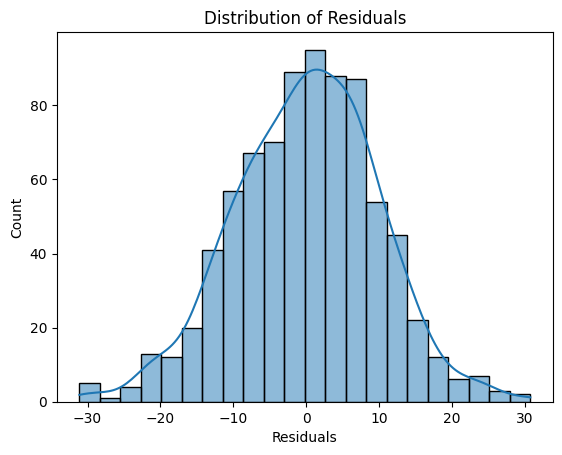

In [11]:
residuals = model.resid

sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

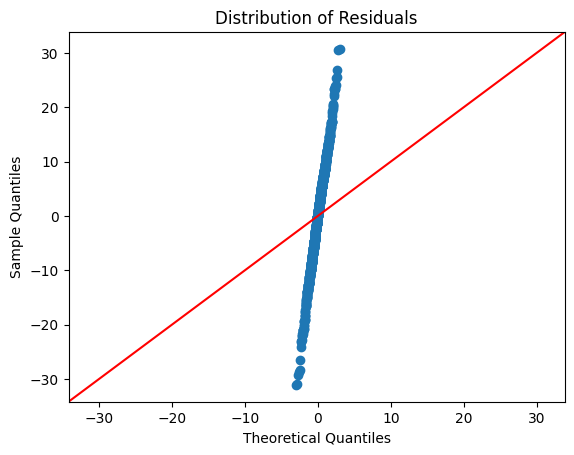

In [12]:
sm.qqplot(residuals, line="45")
plt.title("Distribution of Residuals")
plt.show()

From the histogram, the residuals look roughly centred around zero, but   
the Q–Q plot shows that the points do not line up well with the 45°   
reference line, especially in the tails. This indicates that the residuals  
do not follow a perfect Normal distribution and there is some deviation   
from normality, so the normality assumption is only partially satisfied   
and the results should be interpreted with some caution.

<b> Question 7 -  Plot residuals vs predicted values and interpret the pattern observed.</b>